In [ ]:
#Definición de librerías
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

In [ ]:
#Cargamos el data set
iris = load_iris()
x, y = iris.data, iris.target
print(x.shape)
x = x.reshape(x.shape[0], x.shape[1], 1)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain)

(150, 4)
(105, 4, 1)
(45, 4, 1)
[1 0 0 2 2 0 2 1 0 0 2 2 2 1 2 1 0 0 1 1 0 0 2 2 0 2 1 2 2 0 2 1 1 0 0 0 2
 1 1 2 1 0 2 0 0 1 2 0 1 0 0 2 1 0 0 2 0 2 0 1 2 1 1 1 2 0 2 1 2 2 1 0 2 0
 1 1 2 2 1 1 1 2 0 0 1 0 1 0 2 2 2 1 1 0 2 0 0 0 0 0 1 2 0 1 2]


In [ ]:
#Definición del modelo
model = Sequential()
model.add(Conv1D(16, 2, activation="relu",padding="same", input_shape=(4,1),)) #16 filtros de tamaño 2
model.add(Conv1D(32, 2, activation="relu",padding="same"))
#model.add(Conv1D(16, 2, activation="relu",padding="valid", input_shape=(4,1),))
#model.add(Conv1D(32, 2, activation="relu",padding="valid"))
model.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 4, 16)             48        
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 32)             1056      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 1,299
Trainable params: 1,299
Non-trainable params: 0
_________________________________________________________________


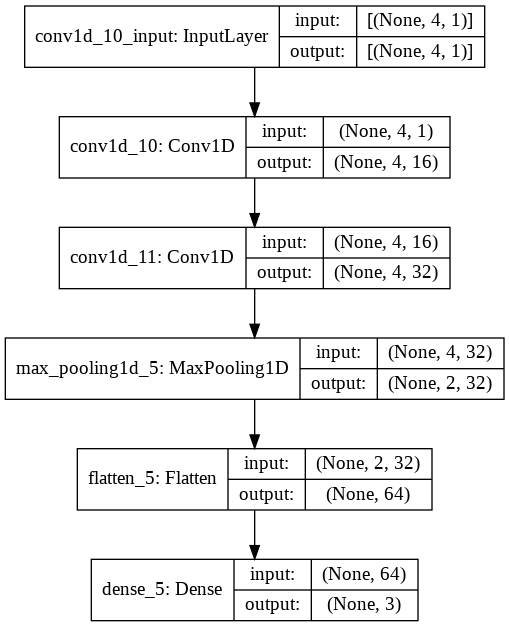

In [ ]:
#Visualización del modelo
keras.utils.plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Entreno el modelo y lo valido
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])

model.fit(xtrain, ytrain, batch_size=16,epochs=100, verbose=1)

acc = model.evaluate(xtrain, ytrain)
print("Loss:", acc[0], " Accuracy:", acc[1])

pred = model.predict(xtest)
pred_y = pred.argmax(axis=-1)

cm = confusion_matrix(ytest, pred_y)
print(cm)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9765
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9876
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.9628
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9878
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9774
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9778
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9856
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9789
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9717
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9797
Epoch 11/100
7/7 [===========